In [2]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from collections import defaultdict
import math

In [4]:
def load_dict(file_name):
    """ Loads a dictionary from a file"""
    with open(f"outputs/{file_name}", 'rb') as f:
        return pickle.load(f)

def reload_data():
    run_info = load_dict("info.pkl")
    policy = load_dict("policy.pkl")
    V = load_dict("V.pkl")
    Q = load_dict("Q.pkl")
    history = load_dict("history.pkl")
    return run_info, policy, V, Q, pd.DataFrame(history)
    
def create_pairs_of_3(d):
    saved_states = list(sorted(d.keys()))
    n_rows = math.ceil(len(saved_states)/3)
    V_hist_new = defaultdict(lambda: {})
    row = 0
    for row in range(n_rows):
        for col in range(3):
            ind = row+col
            if ind > len(saved_states)-1:
                break
            key = saved_states[row+col]
            V_hist_new[row][col] = {key: d[key]}
    return dict(V_hist_new), row

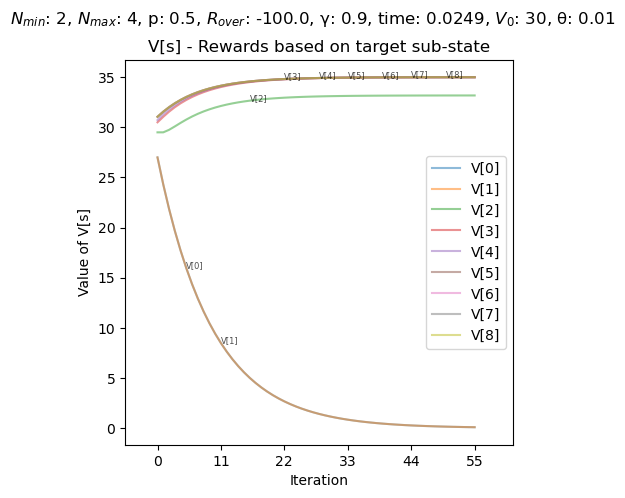

In [156]:
run_info, policy, V, Q, history = reload_data()
iterations = int(run_info['iterations'])

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.set_title(f"V[s] - Rewards based on target sub-state")
ax.set_xlabel("Iteration")
ax.set_xticks(range(0, iterations+1, (iterations+1)//5))
ax.set_ylabel("Value of V[s]")
ax.set_xlim(0-iterations/10, iterations*11/10)
for state in V.keys():
  x = list(history.index)
  y = list(history[f'V[{state}]'])
  ax.plot(history.index, history[f'V[{state}]'], 
          '-', label=f"V[{state}]", alpha=0.5)
  ind = (state+1)*iterations//(len(V)+1)
  ax.text(x[ind], y[ind], f"V[{state}]", 
          fontsize=6, alpha=0.7)

ax.legend(loc='best')

fig.suptitle(r"$N_{min}$" f": {run_info['N_min']}, " r"$N_{max}$" f": {run_info['N_max']}, p: {run_info['p']}, "\
             r"$R_{over}$" f": {run_info['R_over']}, " \
             f"γ: {run_info['gamma']}, time: {run_info['time']}, "\
             r"$V_0$" f": {run_info['V0']}, "\
             f"θ: {run_info['theta']}")

# Add spaces between subplots
plt.subplots_adjust(hspace=0.4)
plt.show()

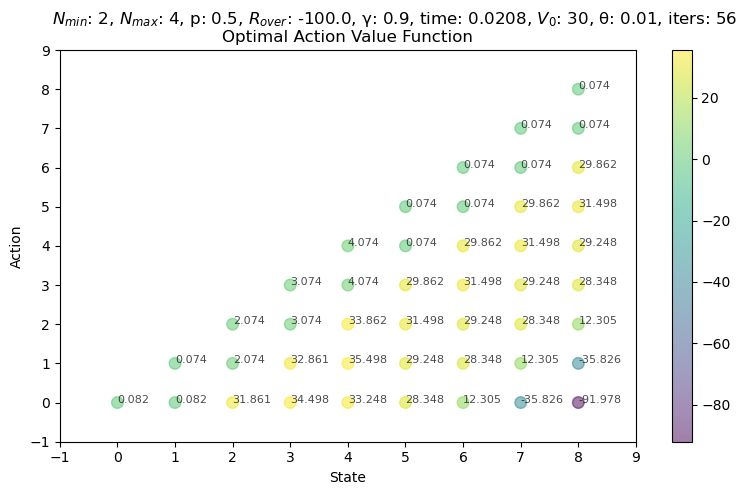

In [151]:
run_info, policy, V, Q, history = reload_data()

# Transform dict of dicts that maps actions to other actions to a dataframe
Q_df = pd.DataFrame([(i, j, Q[i][j]) 
                     for i in Q.keys() for j in Q[i].keys()],
                     columns=['s', "a", 'Value'])

# Plot Q in one figure with sizes based on the value
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.set_title(f"Optimal Action Value Function")
ax.set_xlabel("State")
ax.set_ylabel("Action")
ax.scatter(Q_df['s'], Q_df["a"], c=Q_df['Value'], s=70, alpha=0.5)
# Add labels
for ind, row in Q_df.iterrows():
    ax.text(row['s'], row["a"], f"{row['Value']:.3f}", 
            fontsize=8, alpha=0.7)
# Show colorbar based on existing colors of ax
fig.colorbar(ax.collections[0])
# Set Xticks and Yticks to be the same
ax.set_xticks(np.arange(Q_df['s'].min()-1, Q_df['s'].max()+2))
ax.set_yticks(np.arange(Q_df["a"].min()-1, Q_df["a"].max()+2))
fig.tight_layout()

fig.suptitle(r"$N_{min}$" f": {run_info['N_min']}, " r"$N_{max}$" f": {run_info['N_max']}, p: {run_info['p']}, "\
             r"$R_{over}$" f": {run_info['R_over']}, " \
             f"γ: {run_info['gamma']}, time: {run_info['time']}, "\
             r"$V_0$" f": {run_info['V0']}, "\
             f"θ: {run_info['theta']}, iters: {run_info['iterations']}")
# Add space between title and suptitle
plt.subplots_adjust(top=0.9)
plt.show()

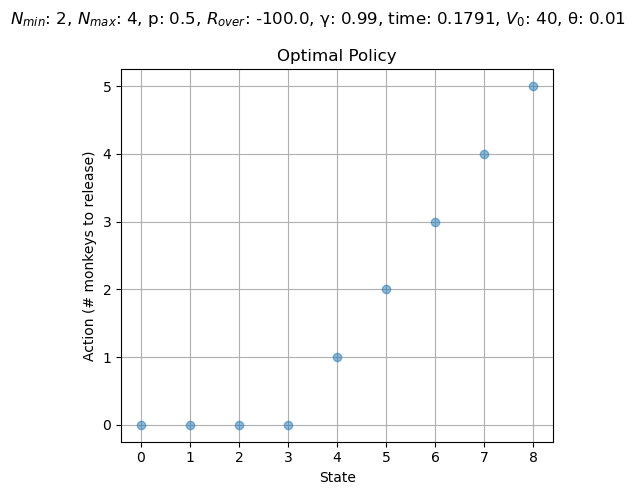

In [167]:
run_info, policy, V, Q, history = reload_data()
polciy_df = pd.DataFrame(policy.items(), columns=['s', 'a'])

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.grid(True)
ax.set_title(f"Optimal Policy")
ax.set_xlabel("State")
ax.set_ylabel('Action (# monkeys to release)')
ax.plot(polciy_df['s'], polciy_df['a'], 'o', alpha=0.5)


fig.suptitle(r"$N_{min}$" f": {run_info['N_min']}, " r"$N_{max}$" f": {run_info['N_max']}, p: {run_info['p']}, "\
             r"$R_{over}$" f": {run_info['R_over']}, " \
             f"γ: {run_info['gamma']}, time: {run_info['time']}, "\
             r"$V_{0}$" f": {run_info['V0']}, "\
             f"θ: {run_info['theta']}")
fig.tight_layout()
plt.show()


Text(0.5, 0.98, '$N_{min}$: 2, $N_{max}$: 4, p: 0.5, $R_{over}$: -100.0, γ: 0.5, $V_0$: 40')

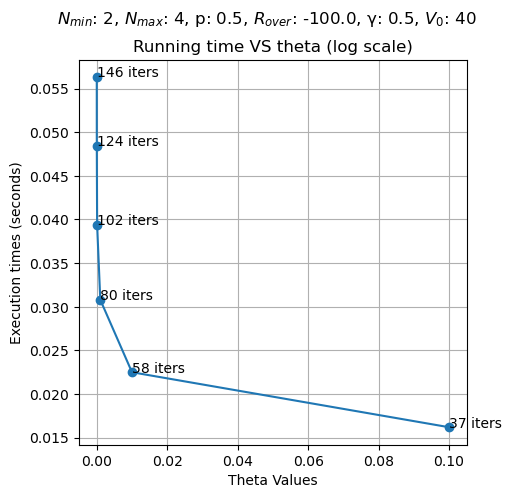

In [161]:
run_info, policy, V, Q, history = reload_data()


times, thetas, iters = [], [], []
with open("outputs/theta_times.txt", 'r') as f:
    for line in f:
        theta, time, iterations, V0 = line.split(' ')
        iters.append(int(iterations))
        times.append(float(time))
        thetas.append(float(theta))
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(thetas, times, 'o-')
for ind in range(len(iters)):
    ax.text(thetas[ind], times[ind], f"{iters[ind]} iters")
ax.grid(True)
ax.set_title(f"Running time VS theta")
ax.set_xlabel("Theta Values")
ax.set_ylabel("Execution times (seconds)")
# ax.set_xscale('log')


fig.suptitle(r"$N_{min}$" f": {run_info['N_min']}, " r"$N_{max}$" f": {run_info['N_max']}, p: {run_info['p']}, "\
             r"$R_{over}$" f": {run_info['R_over']}, " \
             f"γ: {run_info['gamma']}, "\
             r"$V_0$" f": {run_info['V0']}")


Text(0.5, 0.98, '$N_{min}$: 2, $N_{max}$: 4, p: 0.5, $R_{over}$: -100.0, θ: 0.01, $V_0$: 40')

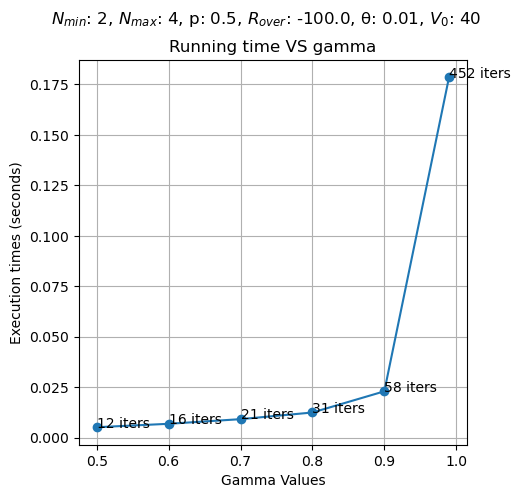

In [168]:
run_info, policy, V, Q, history = reload_data()


times, thetas, iters = [], [], []
with open("outputs/gamma_times.txt", 'r') as f:
    for line in f:
        theta, time, iterations, V0 = line.split(' ')
        iters.append(int(iterations))
        times.append(float(time))
        thetas.append(float(theta))
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(thetas, times, 'o-')
for ind in range(len(iters)):
    ax.text(thetas[ind], times[ind], f"{iters[ind]} iters")
ax.grid(True)
ax.set_title(f"Running time VS gamma")
ax.set_xlabel("Gamma Values")
ax.set_ylabel("Execution times (seconds)")
# ax.set_xscale('log')


fig.suptitle(r"$N_{min}$" f": {run_info['N_min']}, " r"$N_{max}$" f": {run_info['N_max']}, p: {run_info['p']}, "\
             r"$R_{over}$" f": {run_info['R_over']}, " \
             f"θ: {run_info['theta']}, "\
             r"$V_0$" f": {run_info['V0']}")


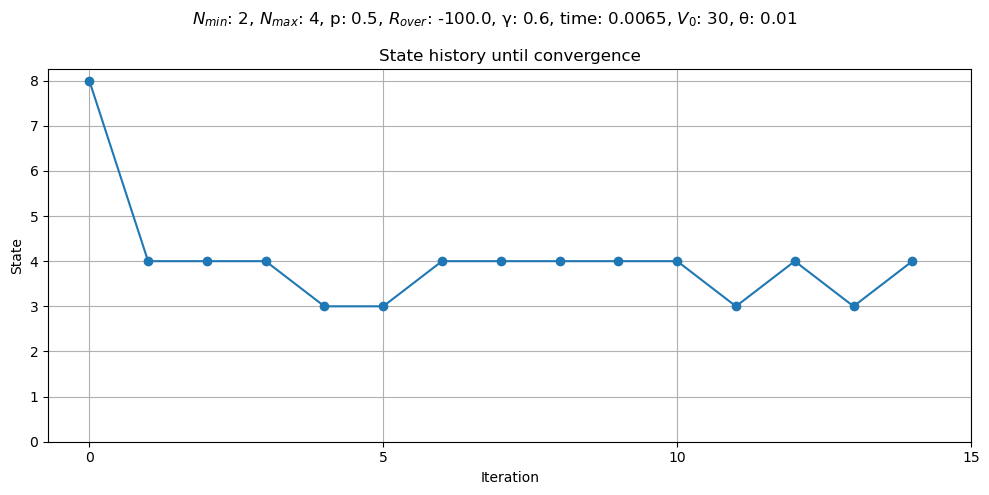

In [30]:
run_info, policy, V, Q, history = reload_data()

history = pd.DataFrame(history)

# display(history)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(history.index, history['s'], 'o-')
ax.set_xticks(np.arange(0, len(history)+1, 5))
ax.set_yticks(np.arange(0, 2*run_info['N_max']+1, 1))
ax.set_title("State history until convergence")
ax.set_xlabel("Iteration")
ax.set_ylabel("State")
ax.grid(True)

fig.suptitle(r"$N_{min}$" f": {run_info['N_min']}, " r"$N_{max}$" f": {run_info['N_max']}, p: {run_info['p']}, "\
             r"$R_{over}$" f": {run_info['R_over']}, " \
             f"γ: {run_info['gamma']}, time: {run_info['time']}, "\
             r"$V_{0}$" f": {run_info['V0']}, "\
             f"θ: {run_info['theta']}")
fig.tight_layout()
plt.show()